<a href="https://colab.research.google.com/github/gan1014/Machine_learning-projects/blob/main/MALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


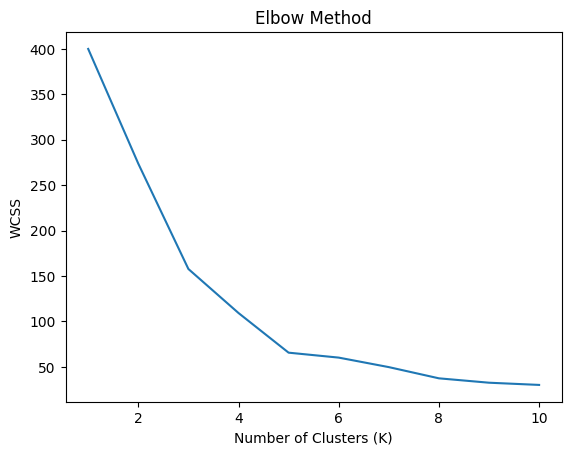

In [8]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Assuming k=5 is chosen from the Elbow Method
k_optimal = 5
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_optimal.fit(X_scaled)
clusters = kmeans_optimal.labels_

silhouette_score(X_scaled, clusters)

np.float64(0.5546571631111091)

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [12]:
df['Cluster'] = clusters
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [14]:
df['Cluster'] = clusters
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


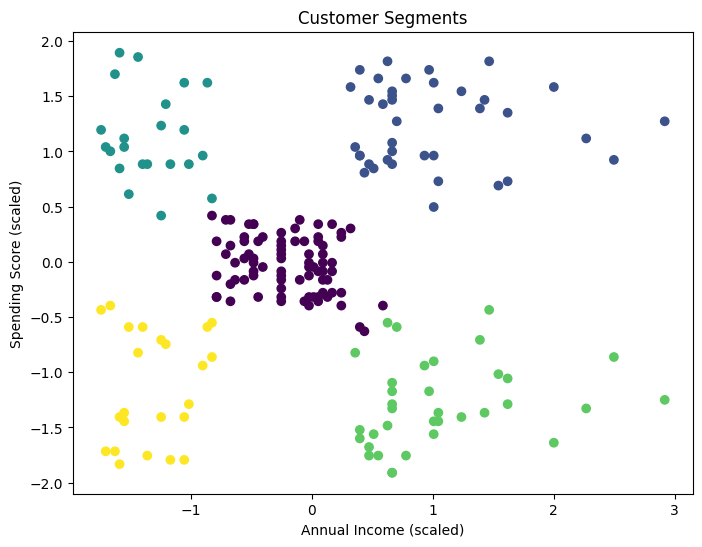

In [15]:
plt.figure(figsize=(8,6))

plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=clusters
)

plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments")
plt.show()


In [16]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043
